In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [3]:
boombikes = pd.read_csv("C:/Users/Pepper/Downloads/day.csv")

In [4]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:

boombikes = boombikes.drop(columns=["casual", "registered"]) 
print(boombikes.head())  


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed   cnt  
0           2  14.110847  18.18125  80.5833  10.749882   985  
1           2  14.902598  17.68695  69.6087  16.652113   801  
2           1   8.050924   9.47025  43.7273  16.636703  1349  
3           1   8.200000  10.60610  59.0435  10.739832  1562  
4           1   9.305237  11.46350  43.6957  12.522300  1600  


In [7]:
boombikes = pd.get_dummies(boombikes, columns=[ "weekday",], dtype=int)  
print(boombikes.head())

   instant      dteday  season  yr  mnth  holiday  workingday  weathersit  \
0        1  01-01-2018       1   0     1        0           0           2   
1        2  02-01-2018       1   0     1        0           0           2   
2        3  03-01-2018       1   0     1        0           1           1   
3        4  04-01-2018       1   0     1        0           1           1   
4        5  05-01-2018       1   0     1        0           1           1   

        temp     atemp      hum  windspeed   cnt  weekday_0  weekday_1  \
0  14.110847  18.18125  80.5833  10.749882   985          0          0   
1  14.902598  17.68695  69.6087  16.652113   801          1          0   
2   8.050924   9.47025  43.7273  16.636703  1349          0          1   
3   8.200000  10.60610  59.0435  10.739832  1562          0          0   
4   9.305237  11.46350  43.6957  12.522300  1600          0          0   

   weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0          0          0          

In [8]:

boombikes = boombikes.drop(columns=["weekday_6"]) 
print(boombikes.head())  


   instant      dteday  season  yr  mnth  holiday  workingday  weathersit  \
0        1  01-01-2018       1   0     1        0           0           2   
1        2  02-01-2018       1   0     1        0           0           2   
2        3  03-01-2018       1   0     1        0           1           1   
3        4  04-01-2018       1   0     1        0           1           1   
4        5  05-01-2018       1   0     1        0           1           1   

        temp     atemp      hum  windspeed   cnt  weekday_0  weekday_1  \
0  14.110847  18.18125  80.5833  10.749882   985          0          0   
1  14.902598  17.68695  69.6087  16.652113   801          1          0   
2   8.050924   9.47025  43.7273  16.636703  1349          0          1   
3   8.200000  10.60610  59.0435  10.739832  1562          0          0   
4   9.305237  11.46350  43.6957  12.522300  1600          0          0   

   weekday_2  weekday_3  weekday_4  weekday_5  
0          0          0          0          

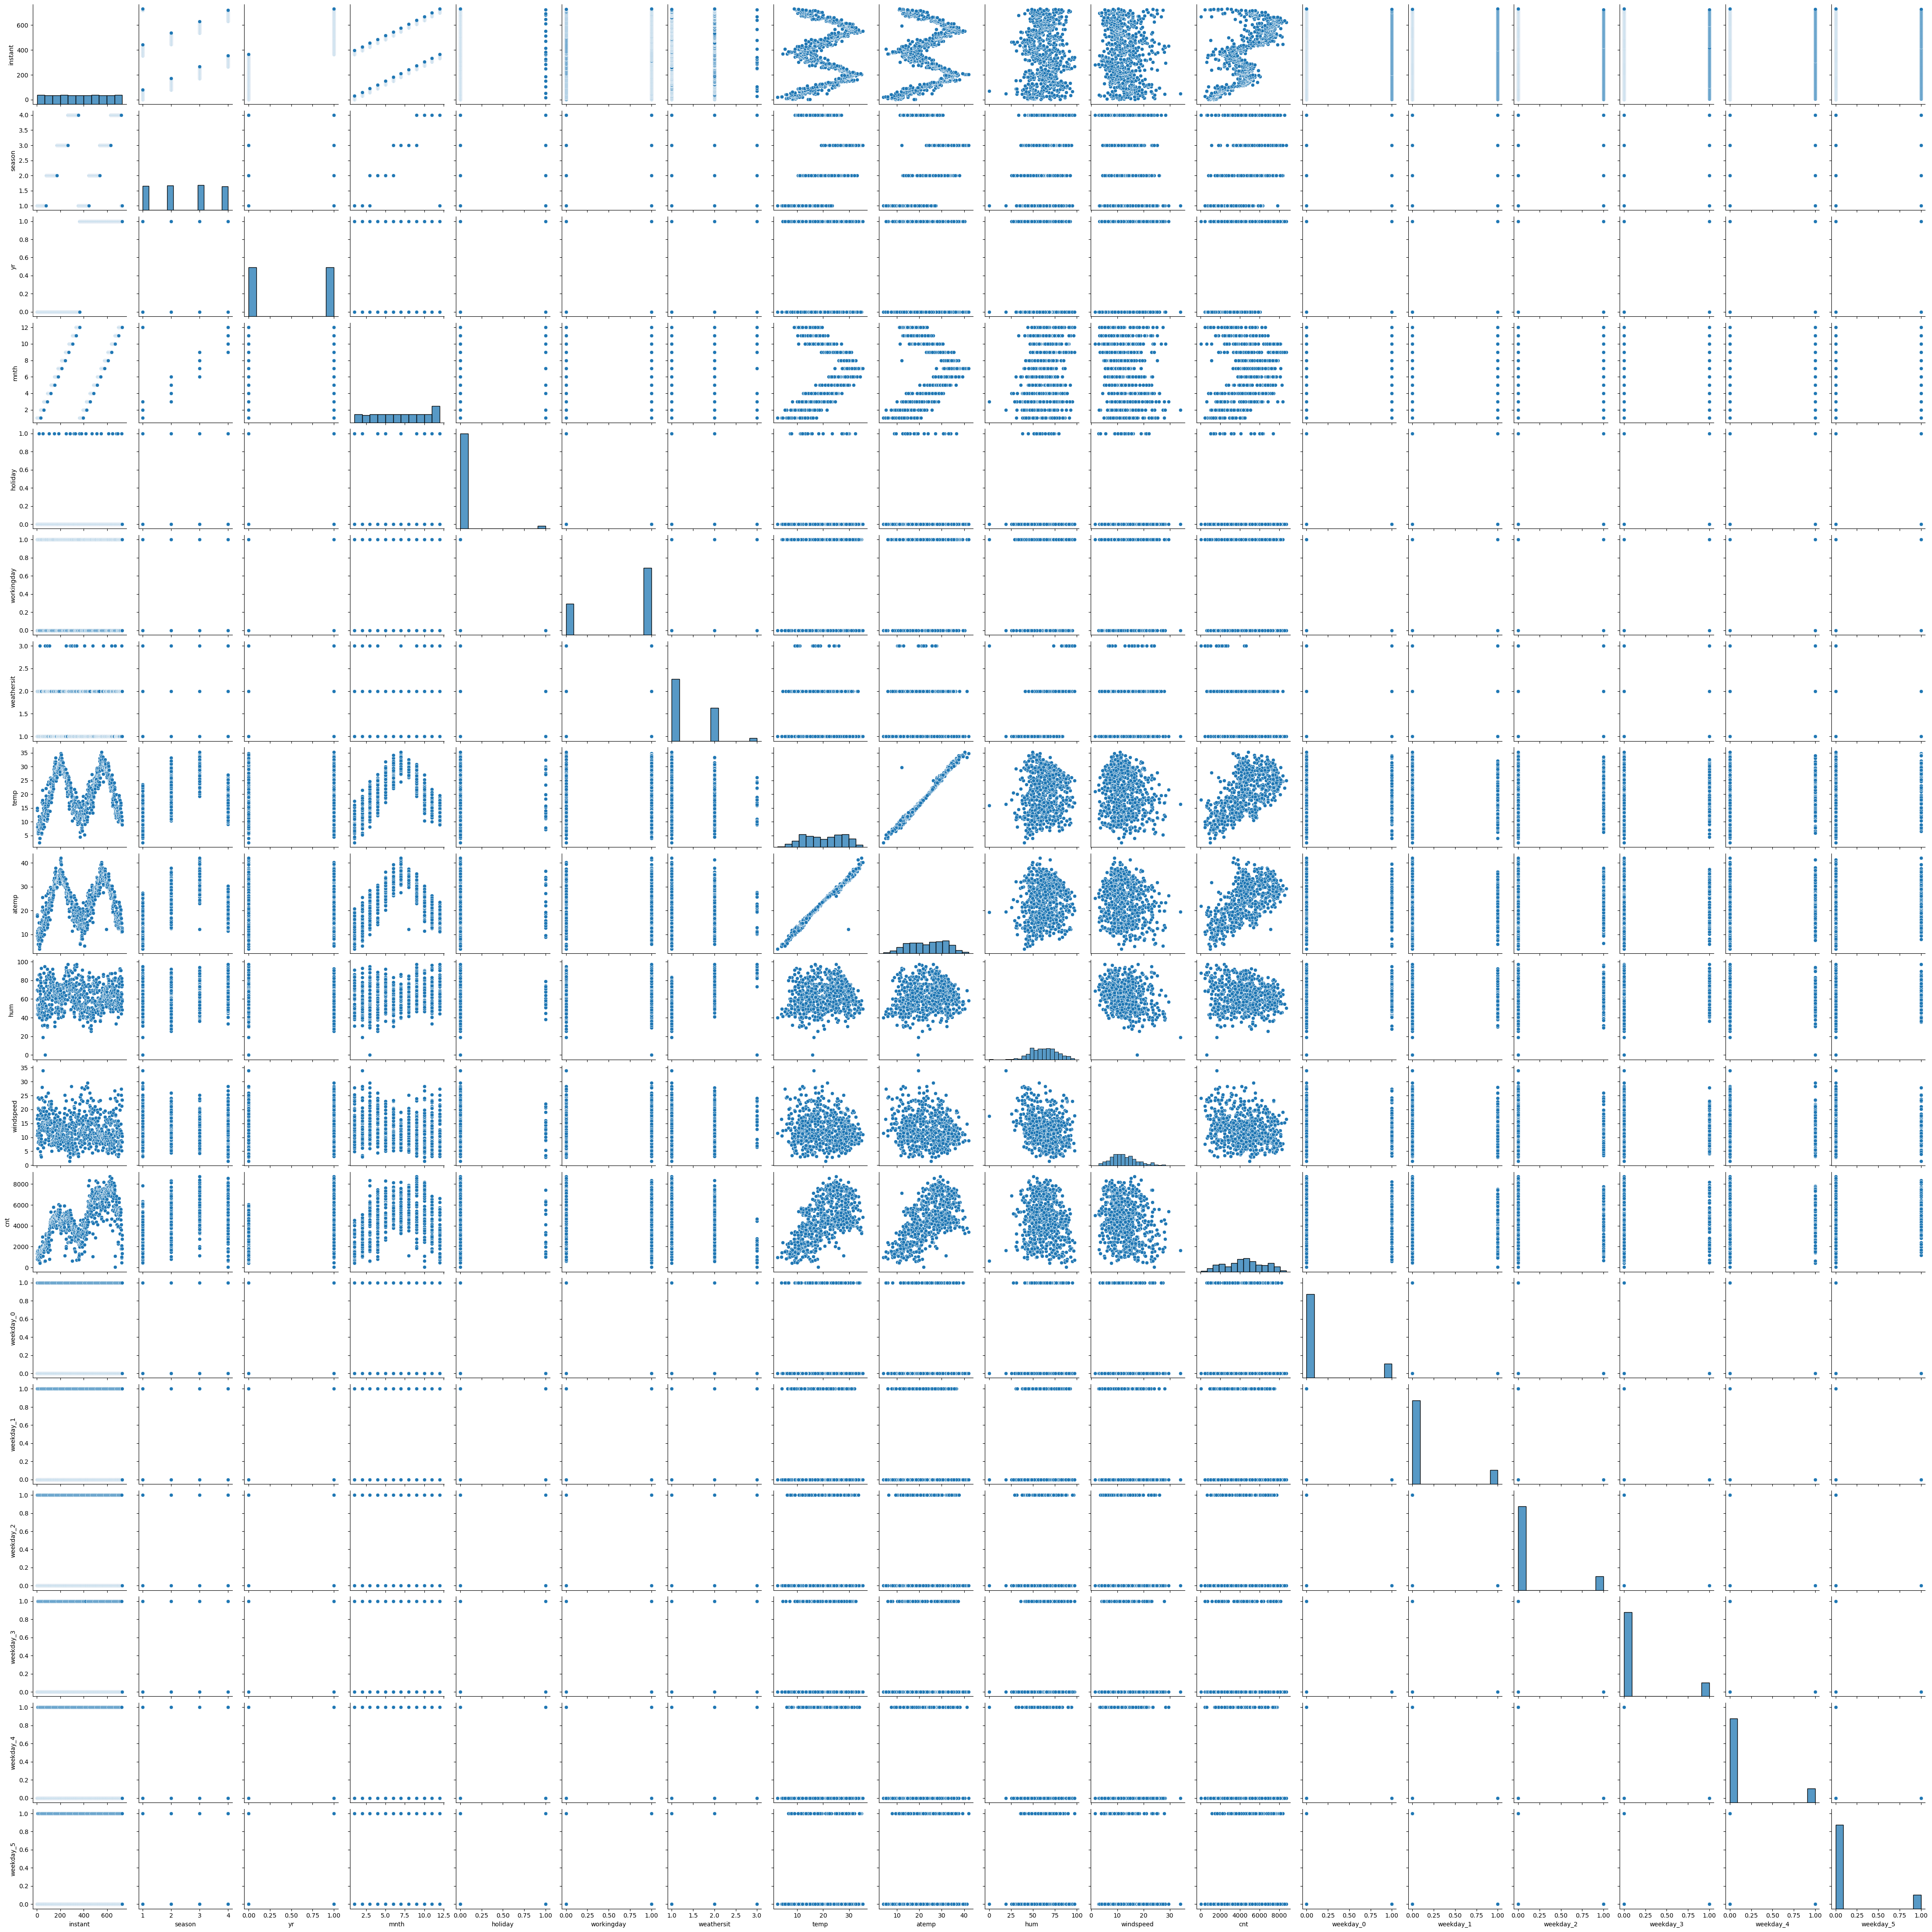

In [9]:
#Visualising numeric variables
sns.pairplot(boombikes)
plt.show()

In [10]:
df_train, df_test = train_test_split(boombikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 19)
(220, 19)


In [11]:
# 1. Instanttiate and onbject
scaler = MinMaxScaler()

#create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 
           'cnt']
# 2.  Fit on data
# scaler.fit
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()
df_train[num_vars]

,temp,atemp,hum,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095
...,...,...,...,...,...
578,0.863973,0.824359,0.679690,0.187140,0.832835
53,0.202618,0.218747,0.435939,0.111379,0.218017
350,0.248216,0.223544,0.577930,0.431816,0.312586
79,0.462664,0.434043,0.759870,0.529881,0.236424


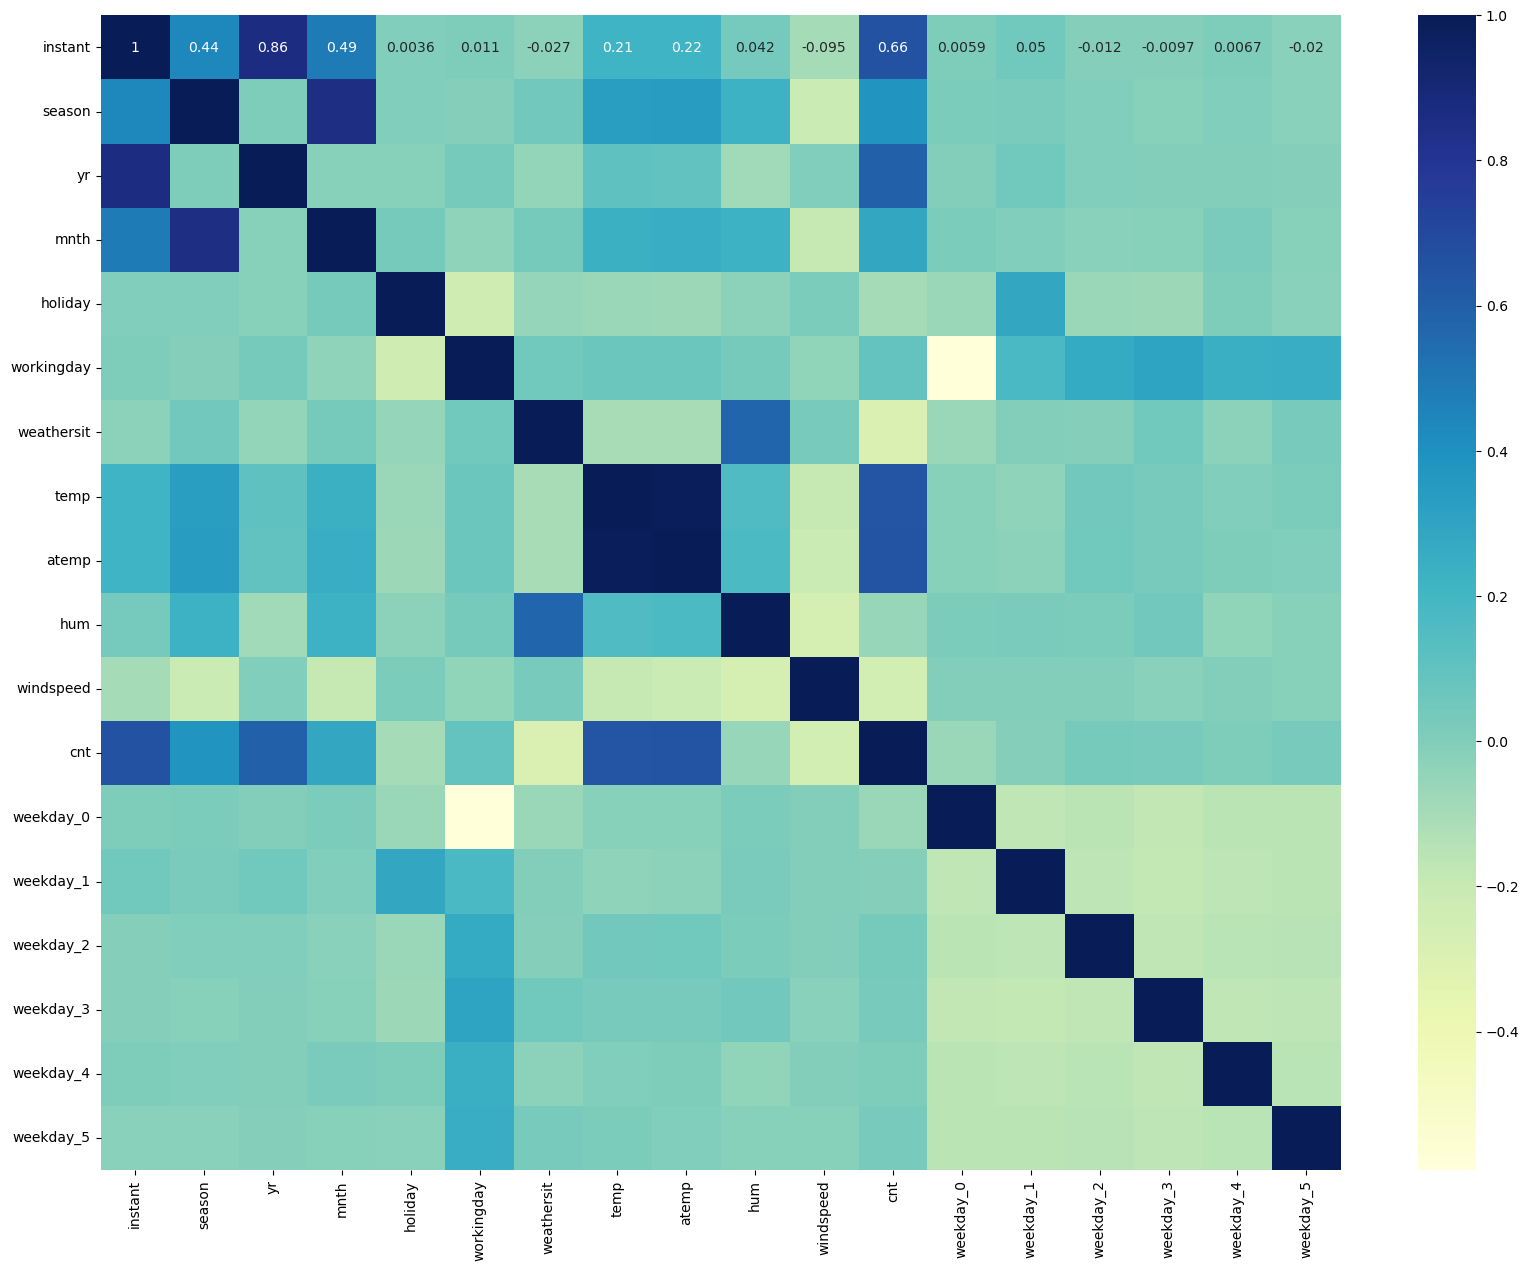

In [12]:
df_train = df_train.drop(['dteday'], axis = 1)

df_train.head()

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True , cmap="YlGnBu" )
plt.show()

In [13]:
df_train.describe()

,instant,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.680392,2.513725,0.507843,6.541176,0.025490,0.676471,1.403922,0.537440,0.513156,0.650480,0.320883,0.513499,0.143137,0.150980,0.131373,0.158824,0.133333,0.127451
std,209.596164,1.110235,0.500429,3.465416,0.157763,0.468282,0.547888,0.225858,0.212410,0.145846,0.169803,0.224421,0.350557,0.358381,0.338139,0.365870,0.340268,0.333805
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,3.000000,1.000000,7.000000,0.000000,1.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,552.750000,3.000000,1.000000,10.000000,0.000000,1.000000,2.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,729.000000,4.000000,1.000000,12.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df_train.head()

,instant,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
576,577,3,1,7,0,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,1,0,0,0
426,427,1,1,3,0,0,2,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0
728,729,1,1,12,0,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0
482,483,2,1,4,0,0,2,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0
111,112,2,0,4,0,1,2,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,0,0,0,1


In [15]:
y_train = df_train.pop('cnt')
X_train = df_train

In [16]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

## Feature Selection using RFE

In [35]:
# build model with all variables

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          3.56e-165
Time:                        21:57:16   Log-Likelihood:                 455.07
No. Observations:                 510   AIC:                            -880.1
Df Residuals:                     495   BIC:                            -816.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2681      0.030      9.007      0.000       0.210       0.327
season         0.0432      0.004      9.860      0.000       0.035       0.052
yr             0.2348      0.009     25.971      0.000       0.217       0.253
holiday       -0.0834      0.026     -3.178      0.002      -0.135      -0.032
workingday     0.0072      0.010      0.700      0.484      -0.013       0.027
weathersit    -0.0790      0.010     -7.536      0.000      -0.100      -0.058
temp           0.2146      0.140      1.528      0.127      -0.061       0.491
atemp          0.2828      0.151      1.877      0.061      -0.013       0.579
hum           -0.1005      0.041     -2.430      0.015      -0.182      -0.019
windspeed     -0.1581      0.029     -5.484      0.000      -0.215      -0.101
weekday_0     -0.0550      0.016     -3.348      0.001      -0.087      -0.023
weekday_1     -0.0260      0.011     -2.361      0.019      -0.048      -0.004
weekday_2     -0.0209      0.013     -1.663      0.097      -0.046       0.004
weekday_3     -0.0092      0.012     -0.780      0.435      -0.032       0.014
weekday_4     -0.0189      0.012     -1.546      0.123      -0.043       0.005
weekday_5     -0.0012      0.013     -0.097      0.923      -0.026       0.024
==============================================================================
Omnibus:                       61.674   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.804
Skew:                          -0.649   Prob(JB):                     1.61e-31
Kurtosis:                       5.233   Cond. No.                     4.35e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.25e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
# Cutoff for p-value is 0.05
# Cutoff for VIF is 5

### Calculating VIF from Variance_Inflation_Factor

In [19]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
16,weekday_5,inf
12,weekday_1,inf
15,weekday_4,inf
14,weekday_3,inf
4,holiday,inf
5,workingday,inf
13,weekday_2,inf
0,instant,2118.59
2,yr,796.04
3,mnth,610.76


In [20]:
X_train = X_train.drop('instant', axis=1)

In [21]:
X_train = X_train.drop('mnth', axis=1)

In [22]:
X_train.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
576,3,1,0,1,1,0.815169,0.766351,0.725633,0.264686,0,0,1,0,0,0
426,1,1,0,0,2,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0
728,1,1,0,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0
482,2,1,0,0,2,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0
111,2,0,0,1,2,0.345824,0.318819,0.751824,0.380981,0,0,0,0,0,1


In [23]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
10,weekday_1,inf
11,weekday_2,inf
12,weekday_3,inf
13,weekday_4,inf
14,weekday_5,inf
6,atemp,349.61
5,temp,336.49
7,hum,26.31


In [24]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 
           'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
184,185,04-07-2018,3,0,7,1,0,2,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,0,0
535,536,20-06-2019,2,1,6,0,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,1,0,0
299,300,27-10-2018,4,0,10,0,1,2,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,1,0
221,222,10-08-2018,3,0,8,0,1,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0
152,153,02-06-2018,2,0,6,0,1,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,1,0


In [25]:
df_test.describe()

,instant,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,358.127273,2.463636,0.481818,6.490909,0.036364,0.700000,1.372727,0.558718,0.532847,0.638221,0.313293,0.522154,0.145455,0.127273,0.168182,0.100000,0.163636,0.177273
std,214.116582,1.111807,0.500809,3.422316,0.187620,0.459303,0.538204,0.233187,0.217401,0.148694,0.159584,0.219163,0.353363,0.334038,0.374881,0.300684,0.370789,0.382770
min,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,171.500000,1.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,350.500000,2.000000,0.000000,6.000000,0.000000,1.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,539.750000,3.000000,1.000000,9.000000,0.000000,1.000000,2.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,1.000000,3.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
y_test = df_test.pop('cnt')
X_test = df_test

In [27]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
184,1.0,185,04-07-2018,3,0,7,1,0,2,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0,0
535,1.0,536,20-06-2019,2,1,6,0,1,1,0.901354,0.842587,0.610133,0.153728,0,0,0,1,0,0
299,1.0,300,27-10-2018,4,0,10,0,1,2,0.511964,0.496145,0.837699,0.334206,0,0,0,0,1,0
221,1.0,222,10-08-2018,3,0,8,0,1,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0
152,1.0,153,02-06-2018,2,0,6,0,1,1,0.817246,0.741471,0.314298,0.537414,0,0,0,0,1,0


In [28]:
X_train.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
576,3,1,0,1,1,0.815169,0.766351,0.725633,0.264686,0,0,1,0,0,0
426,1,1,0,0,2,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0
728,1,1,0,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0
482,2,1,0,0,2,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0
111,2,0,0,1,2,0.345824,0.318819,0.751824,0.380981,0,0,0,0,0,1


In [29]:
X_test_sm.head()

,const,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
184,1.0,185,04-07-2018,3,0,7,1,0,2,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0,0
535,1.0,536,20-06-2019,2,1,6,0,1,1,0.901354,0.842587,0.610133,0.153728,0,0,0,1,0,0
299,1.0,300,27-10-2018,4,0,10,0,1,2,0.511964,0.496145,0.837699,0.334206,0,0,0,0,1,0
221,1.0,222,10-08-2018,3,0,8,0,1,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0
152,1.0,153,02-06-2018,2,0,6,0,1,1,0.817246,0.741471,0.314298,0.537414,0,0,0,0,1,0


In [32]:
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

184    0.453213
535    0.850832
299    0.380760
221    0.634982
152    0.536692
         ...   
702    0.722639
127    0.436486
640    0.784733
72     0.295139
653    0.729467
Length: 220, dtype: float64

In [31]:
X_test_sm = X_test_sm.drop(['dteday'], axis = 1)

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7880348178856937

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7880348178856937